In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn

from pandas.plotting import scatter_matrix
pd.options.mode.chained_assignment = None

# Online Shoppers Intention

Этот набор данных содержит сессии, связанные с поведением пользователей на веб-страницах онлайн-магазина. Каждая сессия принадлежит уникальному пользователю в течение одного года, чтобы избежать склонности к определенному событию, праздничному дню, профилю пользователя или периоду.

Для каждой сессии указано:

 - `Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related`, `Product Related Duration` представляют количество различных типов веб-страниц, посещенных пользователем в рамках одной сессии, и общее время, потраченное на каждую страницу. Значения этих функций извлекаются из URL-адреса посещаемых страниц и обновляются в реальном времени, когда пользователь перемещается по страницам.
 - `Bounce Rate`, `Exit Rate` , `Page Value` представляют собой показатели, измеряемые "Google Analytics" для каждой страницы e-commerce сайта. Значение `Bounce Rate` для веб-страницы представляет собой процент пользователей, которые заходят на сайт с текущей страницы, а затем уходят, не совершая никаких других запросов к серверу аналитики во время этой сессии. Значение `Exit Rate` для конкретной веб-страницы рассчитывается как процент всех просмотров страницы, которые были последними в сессии. `Page Value` представляет собой среднее значение для веб-страницы, которую посетил пользователь перед завершением транзакции.
 - `Special Day` указывает на то, что время посещения сайта близко к празднику (например, Дню матери, Дню святого Валентина), в который сессии с большей вероятностью будут завершены транзакцией. Значение этого атрибута определяется с учетом динамики электронной торговли. (продолжительность между датой заказа и датой доставки)
 - `Operating system` - операционная система пользователя
 - `Browser` - браузер пользователя
 - `Region` - регион / местоположение пользователя
 - `Traffic type` - тип трафика
 - `Visitor type` - вернувшийся пользователь / новый пользователь
 - `Weekend` - выходной день / не выходной день
 - `Month` - месяц
 - `Revenue` - совершит ли пользователь покупку

Задача: построить модель, которая на основе текущих данных предсказывает, совершит ли пользователь интернет-магазина покупку.

## Чтение данных

In [3]:
url = "https://raw.githubusercontent.com/Alexpetr0v/ML-online-shoppers-intention/master/online_shoppers_intention.csv"
data = pd.read_csv(url)

In [4]:
data.shape

(12330, 18)

In [5]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
data.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0.0,0.0,0.0,0.0,3.0,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [7]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
data.index

RangeIndex(start=0, stop=12330, step=1)

## Обработка пропущенных значений

In [10]:
data.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [11]:
data = data.dropna(axis=0)

In [12]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Определим типы признаков. `Operating systems`, `Browser`, `Region`, `Traffic type` классифицируются как числовые признаки, однако они представляют собой числа, которые являются категориями.

In [15]:
cat_cols = ['Month', 'OperatingSystems', 'Browser', 'Region',
            'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
for col in cat_cols:
    data[col] = data[col].astype('category')

In [16]:
data.dtypes

Administrative              float64
Administrative_Duration     float64
Informational               float64
Informational_Duration      float64
ProductRelated              float64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                    category
Revenue                    category
dtype: object

In [18]:
for col in cat_cols:
    print(col)
    print(data[col].unique())
    print('-----------------------')

Month
['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep', 'Dec']
Categories (10, object): ['Feb', 'Mar', 'May', 'Oct', ..., 'Aug', 'Nov', 'Sep', 'Dec']
-----------------------
OperatingSystems
[1, 2, 4, 3, 7, 6, 8, 5]
Categories (8, int64): [1, 2, 4, 3, 7, 6, 8, 5]
-----------------------
Browser
[1, 2, 3, 4, 5, ..., 8, 9, 12, 13, 11]
Length: 13
Categories (13, int64): [1, 2, 3, 4, ..., 9, 12, 13, 11]
-----------------------
Region
[1, 9, 2, 3, 4, 5, 6, 7, 8]
Categories (9, int64): [1, 9, 2, 3, ..., 5, 6, 7, 8]
-----------------------
TrafficType
[1, 2, 3, 4, 5, ..., 18, 19, 16, 17, 20]
Length: 20
Categories (20, int64): [1, 2, 3, 4, ..., 19, 16, 17, 20]
-----------------------
VisitorType
['Returning_Visitor', 'New_Visitor', 'Other']
Categories (3, object): ['Returning_Visitor', 'New_Visitor', 'Other']
-----------------------
Weekend
[False, True]
Categories (2, object): [False, True]
-----------------------
Revenue
[False, True]
Categories (2, object): [False, True]
----

В `Month` отсутствуют два месяца `Jan` и `Apr`. В `VisitorType` есть значение `Other`, давайте посмотрим, сколько образцов имеет значение `Other` в качестве возвращаемого значения пользователя.

In [19]:
sum(data['VisitorType'] == 'Other')

85

В 85 сессиях тип пользователя указан как `Other` - я полагаю, `Other` может иметь какое-то действительно важное значение, поэтому оставим его.

Существуют также отрицательные значения продолжительности, возможно ошибка.

In [20]:
len(data.loc[data['ProductRelated_Duration'] == -1, 'ProductRelated_Duration'])

33

In [21]:
len(data.loc[data['Informational_Duration'] == -1, 'Informational_Duration'])

33

In [22]:
len(data.loc[data['Administrative_Duration'] == -1, 'Administrative_Duration'])

33

Таких записей всего 33, поэтому мы можем удалить их.

In [23]:
data = data.loc[data['Administrative_Duration'] != -1, ]

In [24]:
sum(data[['Administrative_Duration',
          'Informational_Duration',
          'ProductRelated_Duration']].sum(axis = 1) == 0)

685

685 пользователей провели на страницах нулевое количество времени.

## Визуализация и статистика

In [38]:
sns.set(style='white', rc={'figure.figsize':(10, 6)})

##### Характеристики для всех числовых признаков

In [39]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000
mean,2.323862,81.126229,0.505333,34.601780,31.846536,1199.253065,0.021723,0.042611,5.911793,0.061532
std,3.325128,177.046838,1.272138,141.002498,44.521443,1915.935446,0.047686,0.047964,18.600350,0.199122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,187.100000,0.000000,0.014286,0.000000,0.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,602.500000,0.003077,0.025000,0.000000,0.000000
75%,4.000000,93.950000,0.000000,0.000000,38.000000,1470.909852,0.016667,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


##### Характеристики для всех категориальных признаков

In [40]:
data.describe(include=['category'])

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12283,12283,12283,12283,12283,12283,12283,12283
unique,10,8,13,9,20,3,2,2
top,May,2,2,1,2,Returning_Visitor,False,False
freq,3357,6578,7934,4765,3907,10504,9421,10375


#### Распределение пользователей

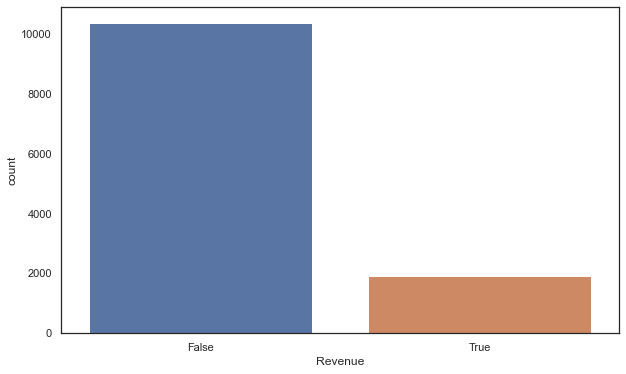

In [41]:
sns.countplot(x='Revenue', data=data)
pass

In [42]:
print(round(sum(data['Revenue'])/len(data['Revenue']), 2)*100, "% пользователей приносят доход")

16.0 % пользователей приносят доход


#### Распределение пользователей по регионам

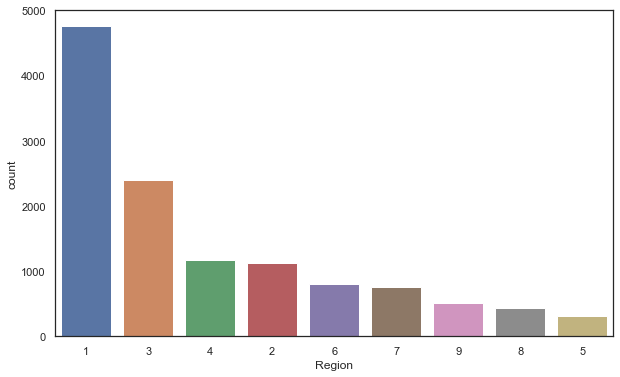

In [43]:
sns.countplot(x='Region', order=data['Region'].value_counts().index, data=data)
pass

In [44]:
data['Region'].value_counts()

1    4765
3    2394
4    1175
2    1130
6     804
7     758
9     508
8     434
5     315
Name: Region, dtype: int64

Больше всего пользователей из региона 1.

#### Распределение дохода по регионам

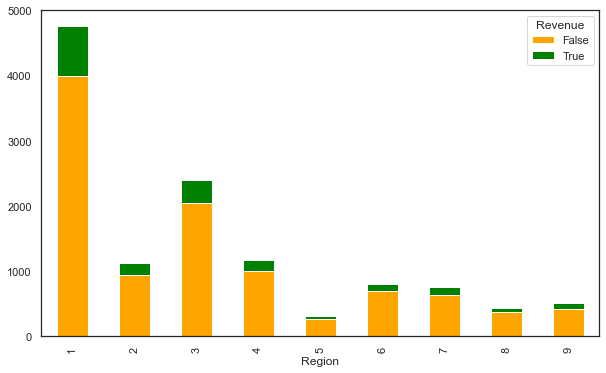

In [46]:
pd.crosstab(data['Region'], data['Revenue']).plot(kind='bar', stacked=True, color=['orange', 'green'])
pass

Наибольший доход получаем от пользователей, которые вошли в систему из региона-1.

#### Распределение типа пользователей

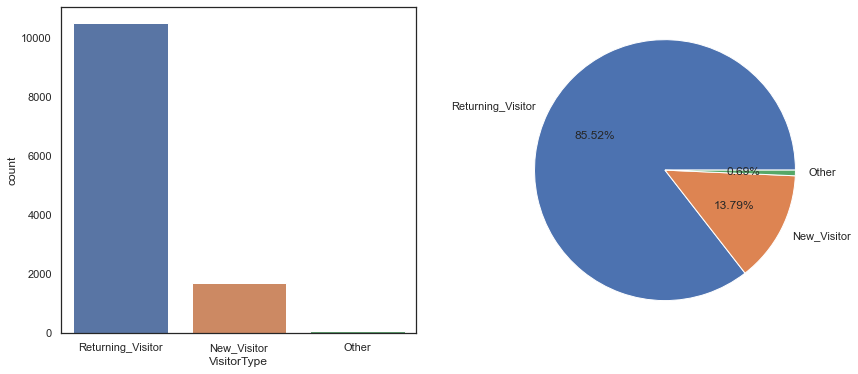

In [61]:
fig, ax = plt.subplots(1, 2, figsize = (14,6))
sns.countplot(x='VisitorType', order=data['VisitorType'].value_counts().index, data=data, ax=ax[0])
plt.pie(data['VisitorType'].value_counts(), labels=['Returning_Visitor', 'New_Visitor', 'Other'], autopct='%.2f%%')
pass

#### Доход в зависимости от типа пользователя

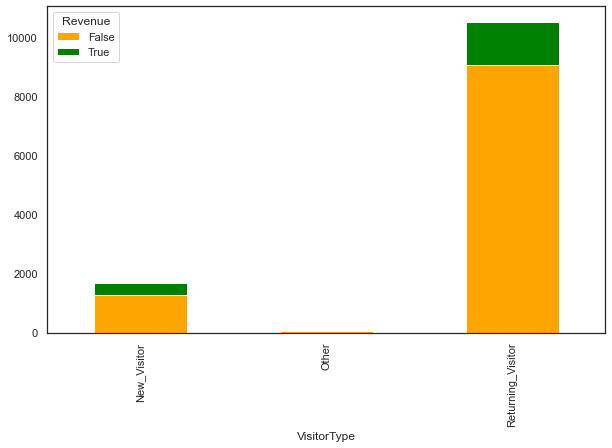

In [62]:
pd.crosstab(data['VisitorType'], data['Revenue']).plot(kind='bar',stacked=True, color=['orange', 'green'])
pass

#### Распределение пользователей по операционным системам

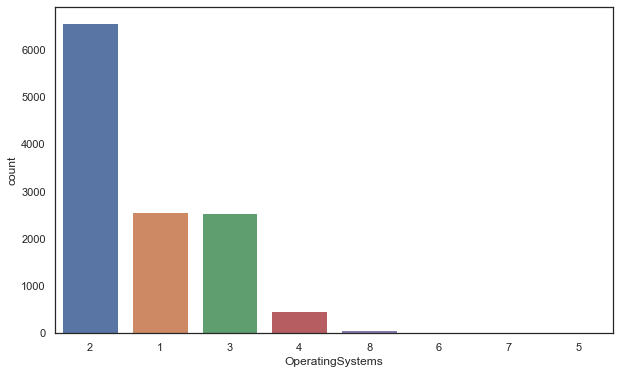

In [63]:
sns.countplot(x='OperatingSystems', order=data['OperatingSystems'].value_counts().index, data=data)
pass

In [64]:
data['OperatingSystems'].value_counts()

2    6578
1    2573
3    2545
4     476
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

Больше половины пользователей используют операционную систему 2.

#### Распределение трафика

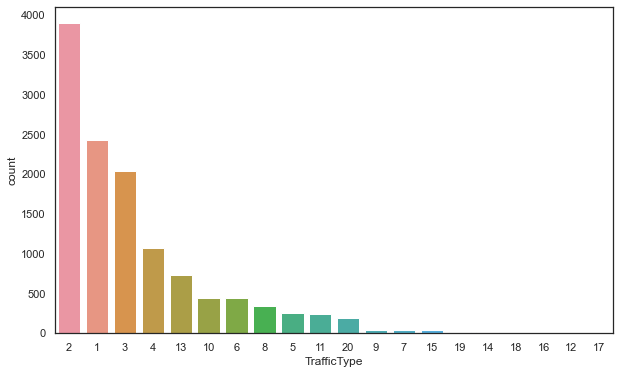

In [66]:
sns.countplot(x='TrafficType', order=data['TrafficType'].value_counts().index, data=data)
pass

#### Доход в зависимости от трафика

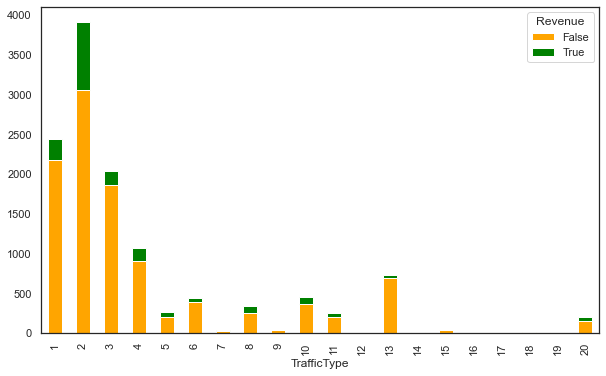

In [67]:
pd.crosstab(data['TrafficType'], data['Revenue']).plot(kind='bar', stacked=True, color=['orange', 'green'])
pass

Наибольший доход получаем от пользователей, имеющий тип трафика - 2.

#### Выходной день или будний

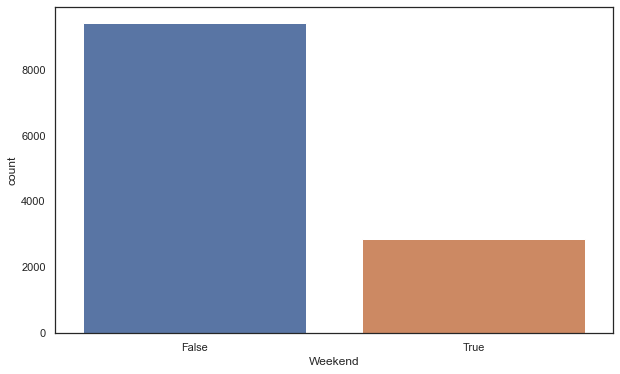

In [68]:
sns.countplot(x='Weekend', data=data)
pass

#### Доход в выходные дни

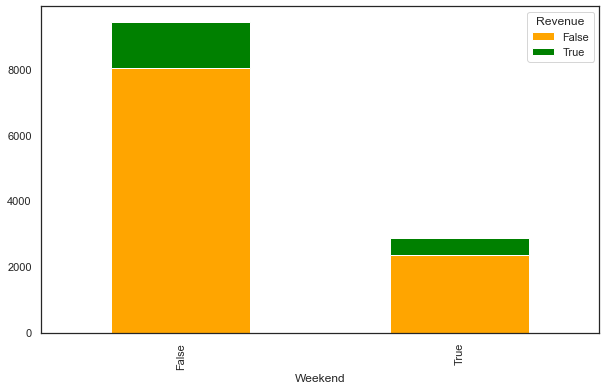

In [69]:
pd.crosstab(data['Weekend'], data['Revenue']).plot(kind='bar', stacked=True, color=['orange', 'green'])
pass

Большая часть дохода была получена в будние дни.

#### Распределение дохода в праздничные дни

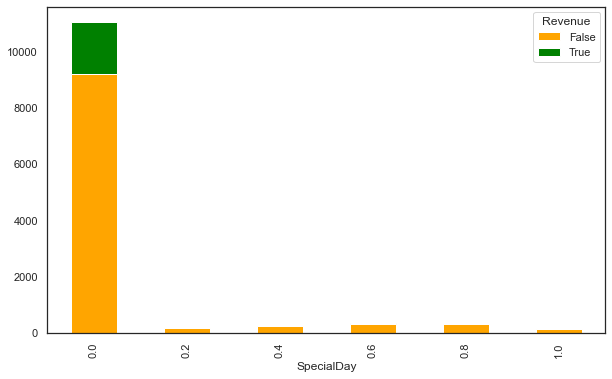

In [71]:
pd.crosstab(data['SpecialDay'], data['Revenue']).plot(kind='bar', stacked=True, color=['orange', 'green'])
pass

#### Распределение пользователей по месяцам

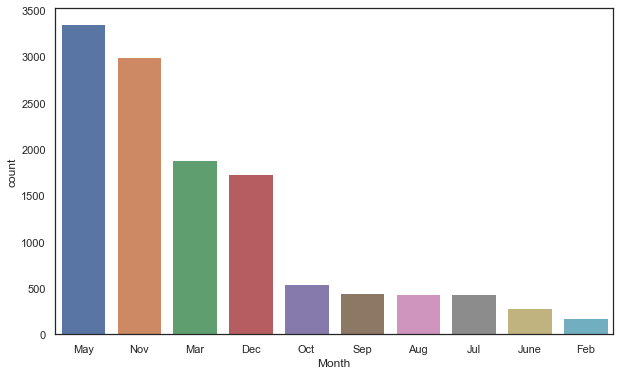

In [72]:
sns.countplot(x='Month', order=data['Month'].value_counts().index, data=data)
pass

#### Распределение дохода по месяцам

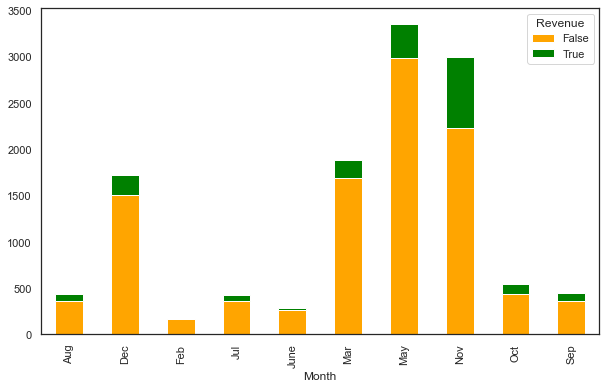

In [74]:
pd.crosstab(data['Month'], data['Revenue']).plot(kind='bar', stacked=True, color=['orange', 'green'])
pass

В ноябре получается самый большой доход.

#### Диаграммы рассеивания

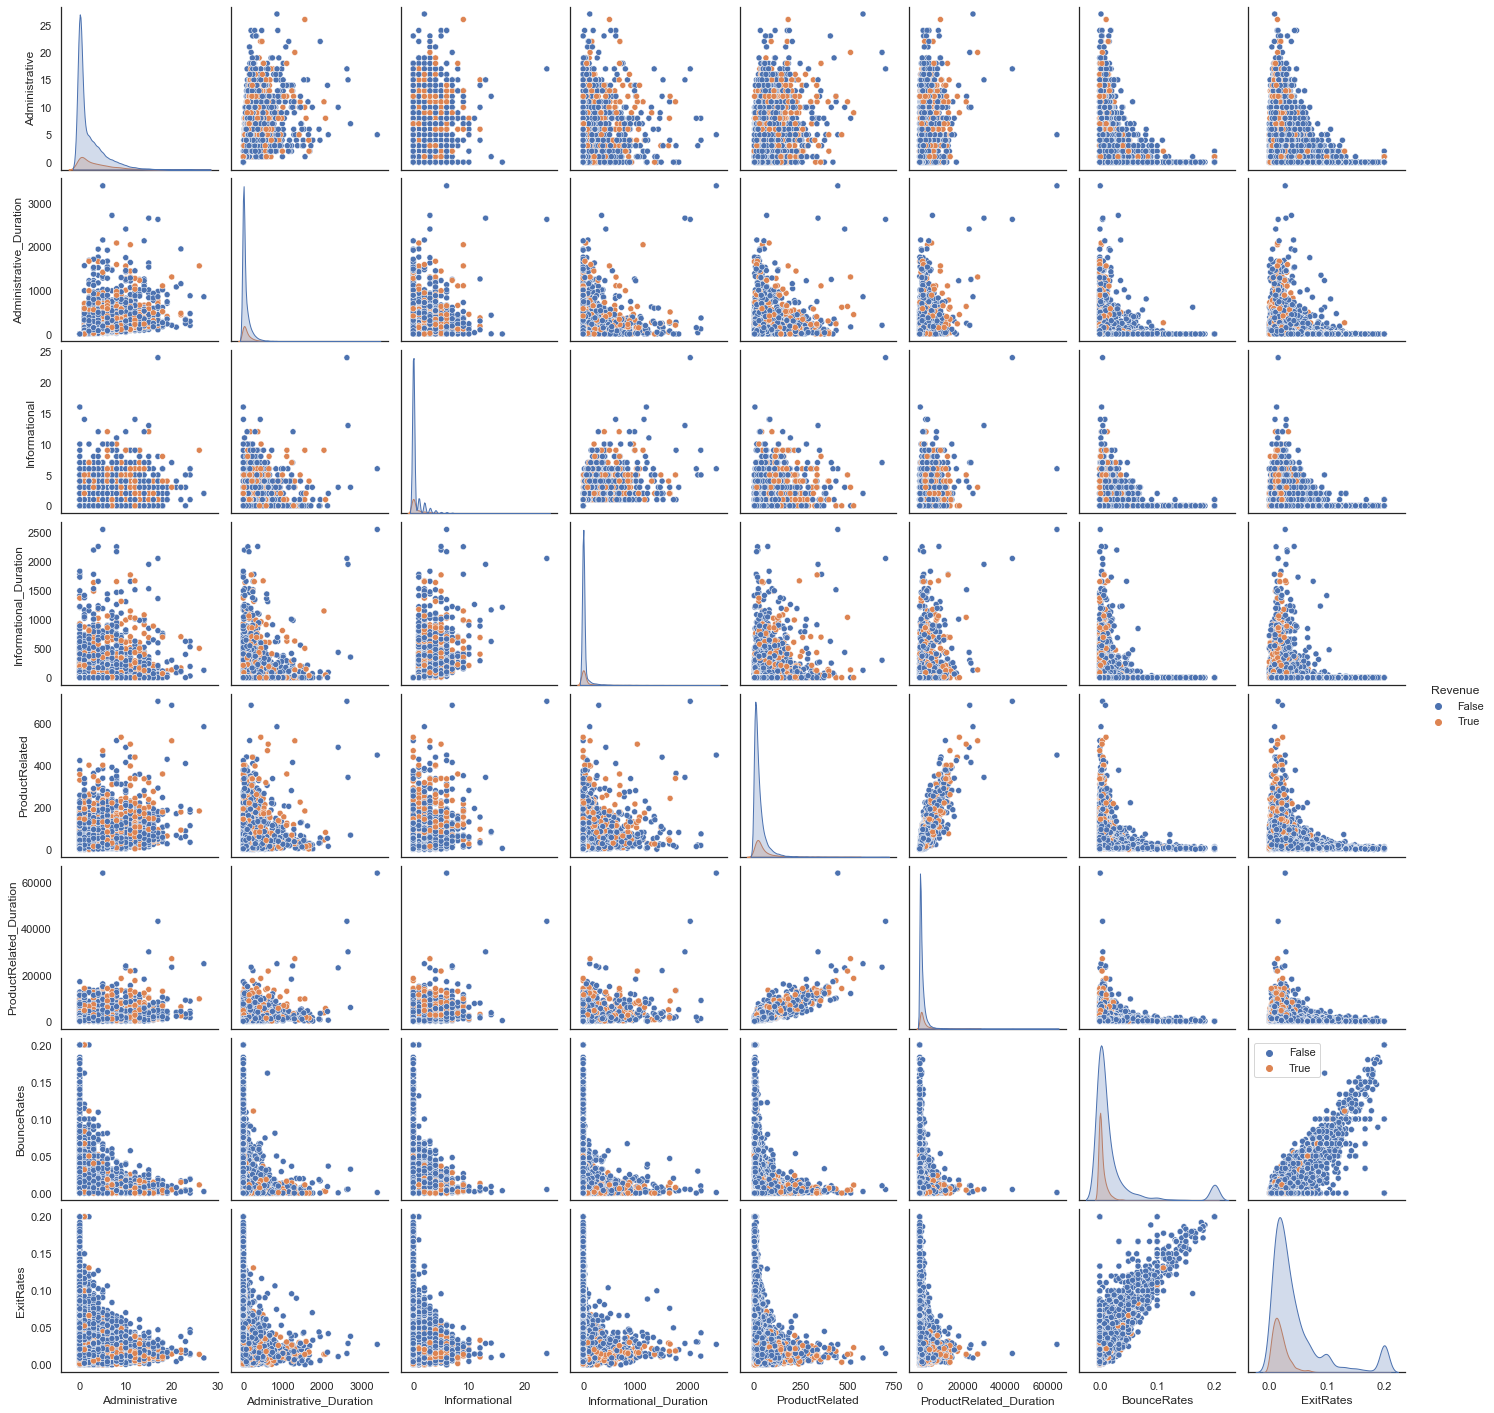

In [76]:
new_data = data[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'Revenue']]
sns.pairplot(new_data, diag_kind='auto', hue='Revenue')
plt.legend()
pass

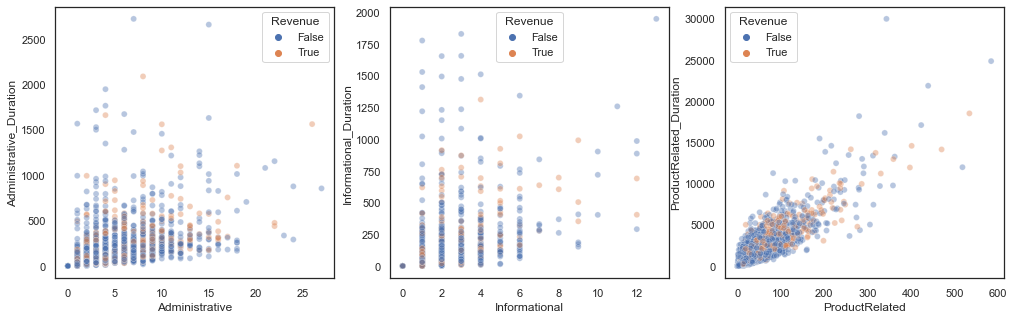

In [86]:
fig, ax = plt.subplots(1, 3, figsize=(17,5))
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=5000, replace=False)
sns.scatterplot(x='Administrative', y='Administrative_Duration', hue='Revenue', data=data.iloc[random_subset], alpha=0.4, ax=ax[0])
sns.scatterplot(x='Informational', y='Informational_Duration', hue='Revenue', data=data.iloc[random_subset], alpha=0.4, ax=ax[1])
sns.scatterplot(x='ProductRelated', y='ProductRelated_Duration', hue='Revenue', data=data.iloc[random_subset], alpha=0.4, ax=ax[2])
pass

- Для начальных типов страниц обнаруживаются пользователи с большой продолжительностью работы:(0-15: административные; 0-10: информационные; 0-300: связанные с продуктом)
- Между `ProductRelated` и `ProductRelated_Duration` существует линейная зависимость (мультиколлинеарность)

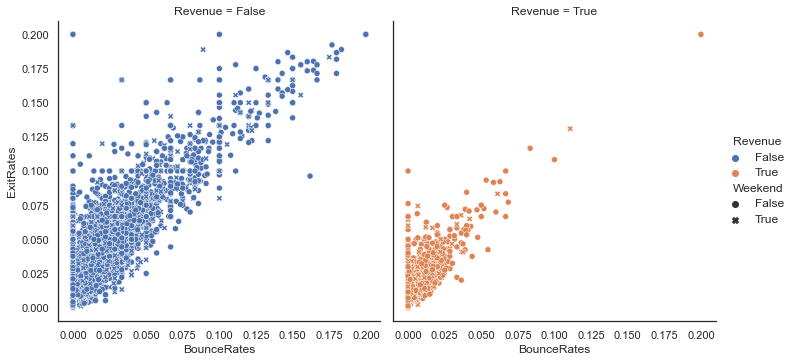

In [87]:
sns.relplot(x='BounceRates', y='ExitRates', col='Revenue', hue='Revenue', style='Weekend', data=data)
pass

- Высокие показатели отказов и выходов не приводят к получению дохода
- Данные о доходах сильно несбалансированы
- Больше отказов и выходов, когда будний день

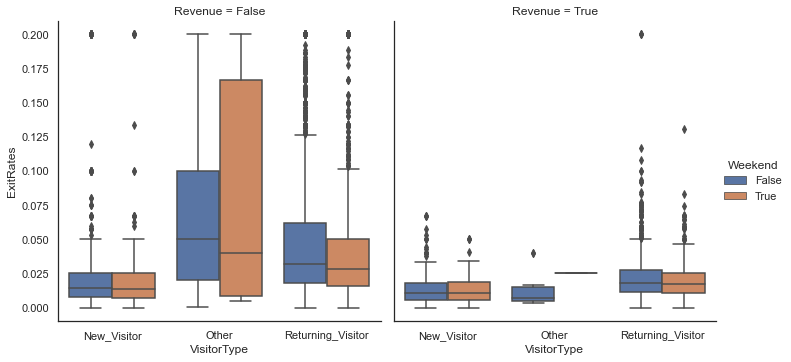

In [88]:
sns.catplot(x='VisitorType', y='ExitRates', hue='Weekend', col='Revenue', data=data, kind='box')
pass

- Когда есть доход, показатель выхода со страниц очень маленький, и количество выходов не сильно меняется, учитывая выходные и тип пользователей.
- Значительные колебания наблюдаются в показателях выхода со страниц из категории Other, когда выходные дни не приносят никакого дохода.
- Новые посетители имеют низкие показатели выхода со страницы, которые практически одинаковы в обоих случаях дохода. Довольно хорошо держать новых посетителей.

#### Матрица корреляции для числовых признаков

In [89]:
corr_mat = data.corr()
corr_mat

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,1.000000,0.601171,0.376374,0.255479,0.430116,0.372935,-0.221188,-0.314919,0.098267,-0.095300
Administrative_Duration,0.601171,1.000000,0.302304,0.237734,0.288277,0.354749,-0.142435,-0.204583,0.067096,-0.073636
Informational,0.376374,0.302304,1.000000,0.618880,0.373680,0.387065,-0.114485,-0.162471,0.048217,-0.048448
Informational_Duration,0.255479,0.237734,0.618880,1.000000,0.279701,0.347088,-0.073064,-0.104530,0.030579,-0.030731
ProductRelated,0.430116,0.288277,0.373680,0.279701,1.000000,0.860711,-0.201828,-0.290579,0.055521,-0.024348
ProductRelated_Duration,0.372935,0.354749,0.387065,0.347088,0.860711,1.000000,-0.181990,-0.249958,0.052124,-0.036757
BounceRates,-0.221188,-0.142435,-0.114485,-0.073064,-0.201828,-0.181990,1.000000,0.911252,-0.118532,0.074726
ExitRates,-0.314919,-0.204583,-0.162471,-0.104530,-0.290579,-0.249958,0.911252,1.000000,-0.174110,0.104718
PageValues,0.098267,0.067096,0.048217,0.030579,0.055521,0.052124,-0.118532,-0.174110,1.000000,-0.063777
SpecialDay,-0.095300,-0.073636,-0.048448,-0.030731,-0.024348,-0.036757,0.074726,0.104718,-0.063777,1.000000


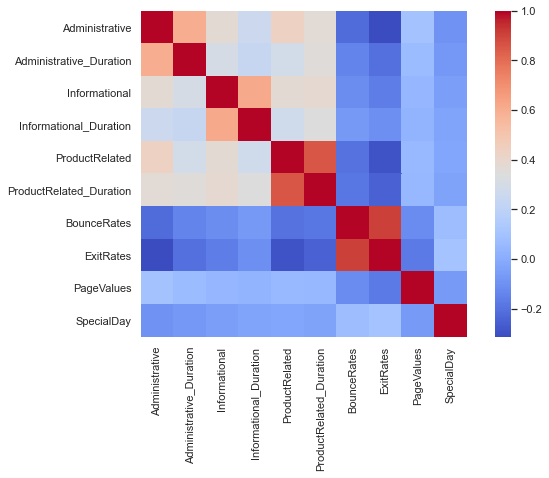

In [90]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Между `ProductRelated` и `ProductRelated_Duration` существует линейная зависимость. Страницы с высоким показателем отказов, как правило, имеют высокий процент выхода со страницы.